# Process impervious data for input into SLAMM

In [1]:
import geowombat as gw
import matplotlib.pyplot as plt
import rioxarray as rx

c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# data paths
raw_data = "../data/raw/"
clean_data = "../data/clean/"

In [6]:
ma_impervious_path = raw_data + "impervious_surface/ma_2021_ccap_v2_hires_impervious_20231005/"
ri_impervious = raw_data + "impervious_surface/"

# cc-1
cc1_imp_path = ma_impervious_path + "cc1_imperv5.tif"
cc1_dem_path = clean_data + "dem/cc1_dem.tif"

# ma-2
ma2_imp_path = ma_impervious_path + "ma2_imperv5.tif"
ma2_dem_path = clean_data + "dem/ma2_dem.tif"

# RI-2
ri2_imp_path = ri_impervious + "ri2_imperv.tif"
ri2_dem_path = clean_data + "dem/ri2_dem.tif"

### Resample the rasters
Need to get the impervious surface data to the same resolution and extent as the DEMs

In [4]:
def resample_raster(in_path_ref: str, in_path_ref_rs: str, out_path:str):

    # Resample to tif
    with gw.config.update(ref_image=in_path_ref):
        with gw.open(in_path_ref_rs, resampling="nearest", nodata=-9999) as src:
            print(src)
           
            # to write out simply:
            src.gw.to_raster(
                out_path + ".tif",
                overwrite=True
            )   

    # Check it looks ok:
    imp_sur = rx.open_rasterio(out_path + ".tif")
    imp_sur = imp_sur * 100
    nodata = imp_sur.rio.nodata
    imp_sur.where(imp_sur != nodata).plot()   

    # Write to asci
    imp_sur.rio.to_raster(out_path + ".asc")

CC-1

<xarray.DataArray (band: 1, y: 8836, x: 12757)> Size: 225MB
dask.array<open_rasterio-f0c54358d614a3ba57d0fca52a579948<this-array>, shape=(1, 8836, 12757), dtype=int16, chunksize=(1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int32 4B 1
  * x        (x) float64 102kB -7.861e+06 -7.861e+06 ... -7.844e+06 -7.844e+06
  * y        (y) float64 71kB 5.102e+06 5.102e+06 ... 5.09e+06 5.09e+06
Attributes: (12/14)
    transform:           (1.3778565541849706, 0.0, -7861342.248498776, 0.0, -...
    crs:                 3857
    res:                 (1.3778565541849706, 1.377856554185005)
    is_tiled:            1
    nodatavals:          (-9999,)
    _FillValue:          -9999
    ...                  ...
    filename:            ../data/raw/impervious_surface/ma_2021_ccap_v2_hires...
    resampling:          nearest
    AREA_OR_POINT:       Area
    DataType:            Thematic
    _data_are_separate:  0
    _data_are_stacked:   0


100%|██████████| 50/50 [00:01<00:00, 30.40it/s]


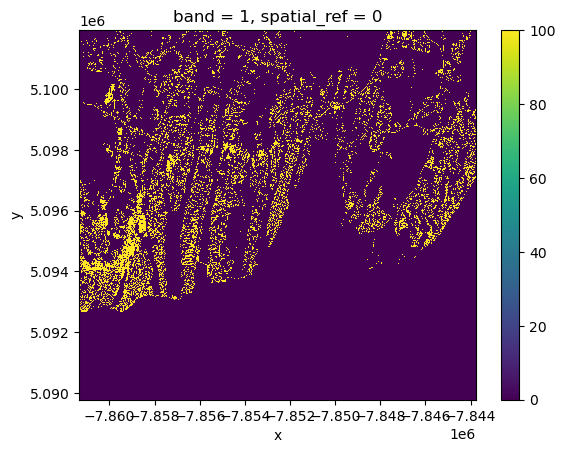

In [5]:
resample_raster(cc1_dem_path, cc1_imp_path, clean_data + "impervious_surfaces/cc1_imp_sur")

<xarray.DataArray (band: 1, y: 11397, x: 18739)> Size: 427MB
dask.array<open_rasterio-0558557ad043e660326034a60116297d<this-array>, shape=(1, 11397, 18739), dtype=int16, chunksize=(1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int32 4B 1
  * x        (x) float64 150kB -7.881e+06 -7.881e+06 ... -7.855e+06 -7.855e+06
  * y        (y) float64 91kB 5.13e+06 5.13e+06 5.13e+06 ... 5.114e+06 5.114e+06
Attributes: (12/14)
    transform:           (1.3778565541850731, 0.0, -7881161.337174174, 0.0, -...
    crs:                 3857
    res:                 (1.3778565541850731, 1.378070526543211)
    is_tiled:            1
    nodatavals:          (-9999,)
    _FillValue:          -9999
    ...                  ...
    filename:            ../data/raw/impervious_surface/ma_2021_ccap_v2_hires...
    resampling:          nearest
    AREA_OR_POINT:       Area
    DataType:            Thematic
    _data_are_separate:  0
    _data_are_stacked:   0


100%|██████████| 30/30 [00:01<00:00, 25.99it/s]


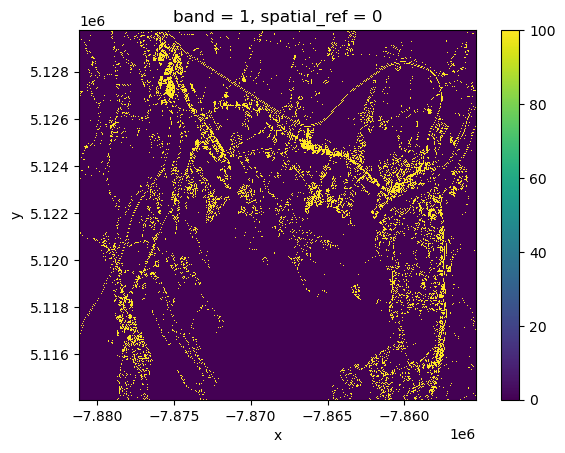

In [6]:
resample_raster(ma2_dem_path, ma2_imp_path, clean_data + "impervious_surfaces/ma2_imp_sur")

<xarray.DataArray (band: 1, y: 5562, x: 3789)> Size: 42MB
dask.array<open_rasterio-9aa6e138628b27462e2aedbe4e08d15c<this-array>, shape=(1, 5562, 3789), dtype=int16, chunksize=(1, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int32 4B 1
  * x        (x) float64 30kB 8.045e+05 8.045e+05 ... 8.082e+05 8.082e+05
  * y        (y) float64 44kB 4.633e+06 4.633e+06 ... 4.627e+06 4.627e+06
Attributes: (12/14)
    transform:           (1.0, 0.0, 804453.0, 0.0, -1.0, 4632971.0)
    crs:                 26918
    res:                 (1.0, 1.0)
    is_tiled:            1
    nodatavals:          (-9999,)
    _FillValue:          -9999
    ...                  ...
    filename:            ../data/raw/impervious_surface/ri2_imperv.tif
    resampling:          nearest
    AREA_OR_POINT:       Area
    DataType:            Generic
    _data_are_separate:  0
    _data_are_stacked:   0


100%|██████████| 20/20 [00:00<00:00, 56.52it/s]


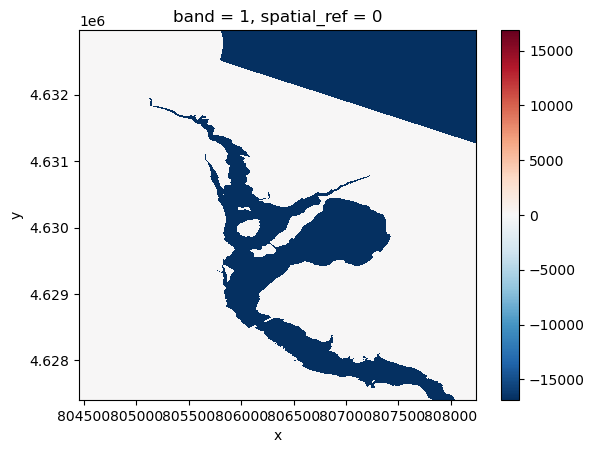

In [7]:
resample_raster(ri2_dem_path, ri2_imp_path, clean_data + "impervious_surfaces/ri2_imp_sur")